In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM, SimpleRNN

# time stepÎßåÌÅº ÏãúÌÄÄÏä§ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
def split_sequence(sequence, step):
  x, y = list(), list()

  for i in range(len(sequence)):
    end_idx = i + step
    if end_idx > len(sequence) - 1:
      break

    seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
    x.append(seq_x)
    y.append(seq_y)

  return np.array(x), np.array(y)


# sin Ìï®Ïàò ÌïôÏäµ Îç∞Ïù¥ÌÑ∞
x = [i for i in np.arange(start=-10, stop=10, step=0.1)]
train_y = [np.sin(i) for i in x]

# 6.3 Í∞úÏ≤¥Î™Ö Ïù∏ÏãùÏùÑ ÏúÑÌïú ÏñëÎ∞©Ìñ• LSTM Î™®Îç∏

Ïù¥Î≤àÏóêÎäî Ï±óÎ¥á ÏóîÏßÑÏóê **Í∞úÏ≤¥Î™Ö Ïù∏Ïãù(named entity recognition)**ÏùÑ ÏúÑÌï¥ ÏÇ¨Ïö©ÌïòÎäî **ÏñëÎ∞©Ìñ• LSTM(Bi-LSTM)**Ïóê ÎåÄÌï¥ ÏïåÏïÑÎ¥ÖÏãúÎã§.

### **LSTM**

ÏàúÌôò Ïã†Í≤ΩÎßù Î™®Îç∏Ïùò ÏùºÏ¢ÖÏúºÎ°ú **ÏãúÌÄÄÏä§ ÎòêÎäî ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞**Ïùò Ìå®ÌÑ¥ÏùÑ Ïù∏ÏãùÌïòÎäî Î∂ÑÏïºÏóê ÎßéÏù¥ ÏÇ¨Ïö©Îê©ÎãàÎã§.

Ïó∞ÏÜçÏ†ÅÏù∏ Îç∞Ïù¥ÌÑ∞Ïùò Ìå®ÌÑ¥ÏùÑ Ïù¥Ïö©Ìï¥ Í≤∞Í≥ºÎ•º ÏòàÏ∏°ÌïòÎØÄÎ°ú Ï£ºÎ°ú Ï£ºÍ∞Ä ÏòàÏ∏°Ïù¥ÎÇò Ïã†Ìò∏ Î∂ÑÏÑù Î∞è Î≤àÏó≠ Î∂ÑÏïºÏóêÏÑú Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥ÏûÖÎãàÎã§.

## 6.3.1 RNN 

### **RNN(Recurrent Neural Network)**

LSTMÏùÄ RNN Î™®Îç∏ÏóêÏÑú ÌååÏÉùÎêòÏóàÏäµÎãàÎã§. RNNÏùÄ ÏàúÌôò Ïã†Í≤ΩÎßùÏúºÎ°ú Î∂àÎ¶¨Î©∞, ÏïûÏÑú Î∞∞Ïö¥ Ïã†Í≤ΩÎßù Î™®Îç∏Í≥º Îã§Î•¥Í≤å **ÏùÄÎãâÏ∏µ ÎÖ∏ÎìúÏùò Ï∂úÎ†•Í∞íÏùÑ Ï∂úÎ†•Ï∏µÍ≥º Í∑∏Îã§Ïùå ÏãúÏ†êÏùò ÏùÄÎãâÏ∏µ ÎÖ∏ÎìúÏùò ÏûÖÎ†•ÏúºÎ°ú Ï†ÑÎã¨**Ìï¥ ÏàúÌôòÌïòÎäî ÌäπÏßïÏùÑ Í∞ñÍ≥† ÏûàÏäµÎãàÎã§.
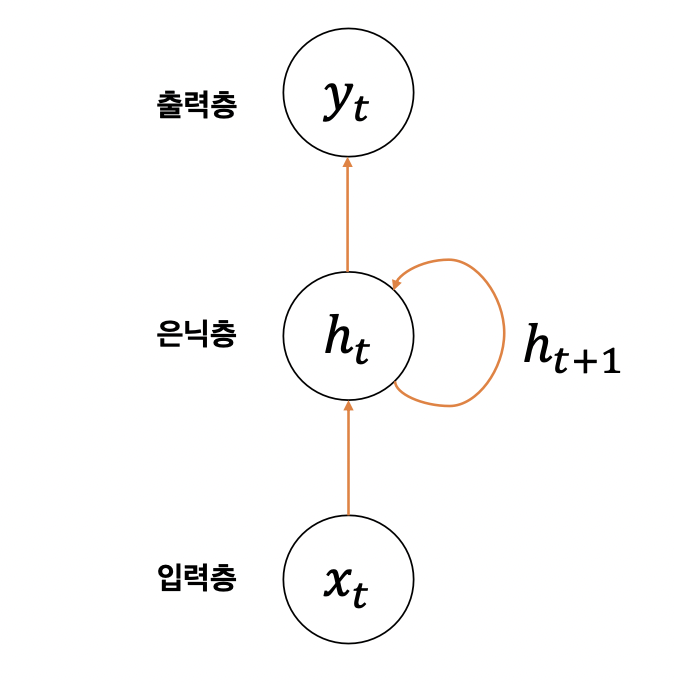

### RNNÏùò ÌäπÏßï

- $t$Îäî ÌòÑÏû¨ ÏãúÏ†êÏùÑ ÏùòÎØ∏ÌïòÍ≥†  $x_t$Îäî ÌòÑÏû¨ ÏãúÏ†êÏùò ÏûÖÎ†• Î≤°ÌÑ∞, $y_t$Îäî ÌòÑÏû¨ ÏãúÏ†êÏùò Ï∂úÎ†• Î≤°ÌÑ∞Î•º ÏùòÎØ∏Ìï©ÎãàÎã§.
- **ÏÖÄ(Î©îÎ™®Î¶¨ ÏÖÄ)**: ÏùÄÎãâÏ∏µ ÎÖ∏ÎìúÏóêÏÑú Ïù¥Ï†Ñ ÏãúÏ†ê($t$-1)Ïùò ÏÉÅÌÉØÍ∞íÏùÑ Ï†ÄÏû•ÌïòÎäî Î©îÎ™®Î¶¨ Ïó≠Ìï†ÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
- **ÏùÄÎãâ ÏÉÅÌÉú(hidden state)**: Î©îÎ™®Î¶¨ ÏÖÄÏùò Ï∂úÎ†• Î≤°ÌÑ∞Í∞Ä Ï∂úÎ†•Ï∏µÍ≥º Îã§Ïùå ÏãúÏ†ê($t$+1)Ïùò Î©îÎ™®Î¶¨ ÏÖÄÏóê Ï†ÑÎã¨ÎêòÎäî ÏÉÅÌÉú
- $h_t$Îäî ÌòÑÏû¨ ÏãúÏ†êÏùò ÏùÄÎãâ ÏÉÅÌÉú, $h_{t+1}$ÏùÄ Îã§Ïùå ÏãúÏ†êÏùò ÏùÄÎãâ ÏÉÅÌÉúÎ•º ÏùòÎØ∏Ìï©ÎãàÎã§.

### ÏãúÏ†êÏùò ÌùêÎ¶ÑÏóê Îî∞Î•∏ RNN Î™®Îç∏ ÌëúÌòÑ

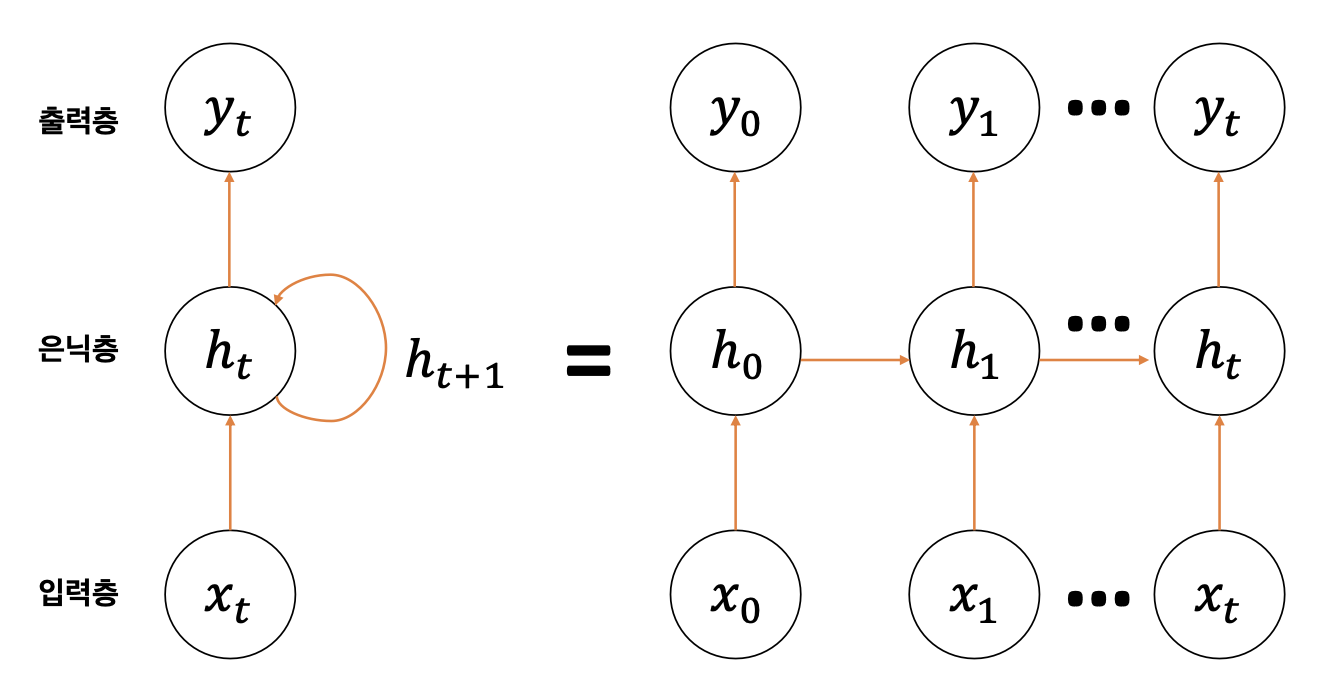

‚ùóÔ∏è**Ï§ëÏöî**‚ùóÔ∏è

**ÌòÑÏû¨ ÏãúÏ†êÏùò Î©îÎ™®Î¶¨ ÏÖÄÏùÄ Ïù¥Ï†Ñ ÏãúÏ†êÏùò ÏùÄÎãâ ÏÉÅÌÉØÍ∞íÏóê ÏòÅÌñ•ÏùÑ Î∞õÍ≥† ÏûàÏúºÎ©∞ ÏôÑÏ†Ñ Ïó∞Í≤∞ Í≥ÑÏ∏µ Íµ¨Ï°∞Î•º Í∞ÄÏßÄÍ≥† ÏûàÎã§**Îäî Í≤ÉÏûÖÎãàÎã§.

### ÏûÖÎ†•Í≥º Ï∂úÎ†•Ïùò Í∏∏Ïù¥Ïóê Îî∞Î•∏ RNN Î™®Îç∏ ÏòàÏãú

1) **many-to-one:** Ïó¨Îü¨ Í∞úÎ•º ÏûÖÎ†• Î∞õÏïÑ ÌïòÎÇòÎ•º Ï∂úÎ†•
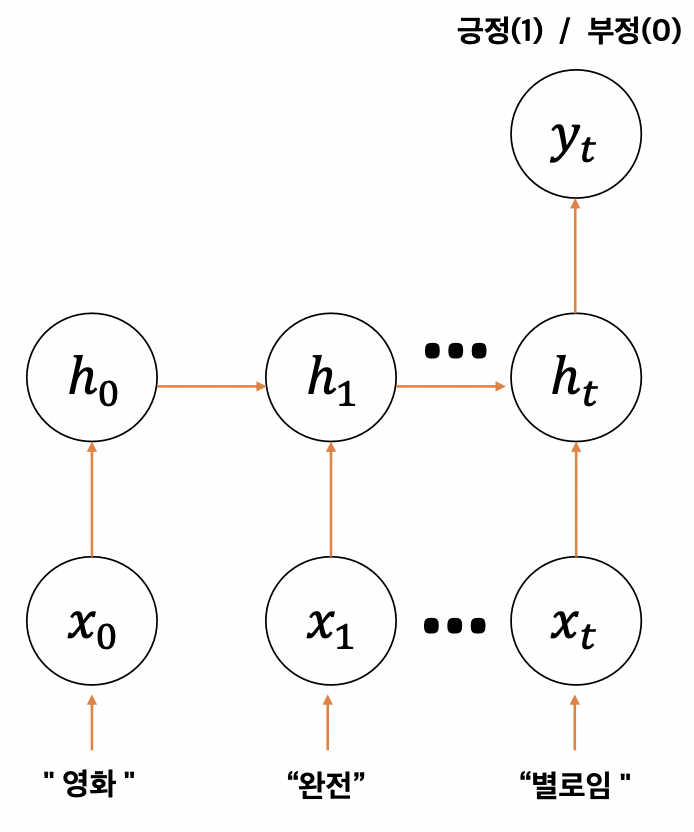
- Î¨∏Ïû• ÏãúÌÄÄÏä§Î•º ÏûÖÎ†•Î∞õÏïÑ Ìï¥Îãπ Î¨∏Ïû•Ïù¥ Í∏çÏ†ïÏù∏ÏßÄ Î∂ÄÏ†ïÏù∏ÏßÄ Î∂ÑÎ•òÌïòÎäî Î¨∏Ï†úÏùò ÏòàÏãúÏûÖÎãàÎã§.

2) ÌïòÎÇòÎ•º ÏûÖÎ†•Î∞õÏïÑ Ïó¨Îü¨ Í∞úÎ•º Ï∂úÎ†•ÌïòÎäî **one-to-man
y** Î™®Îç∏
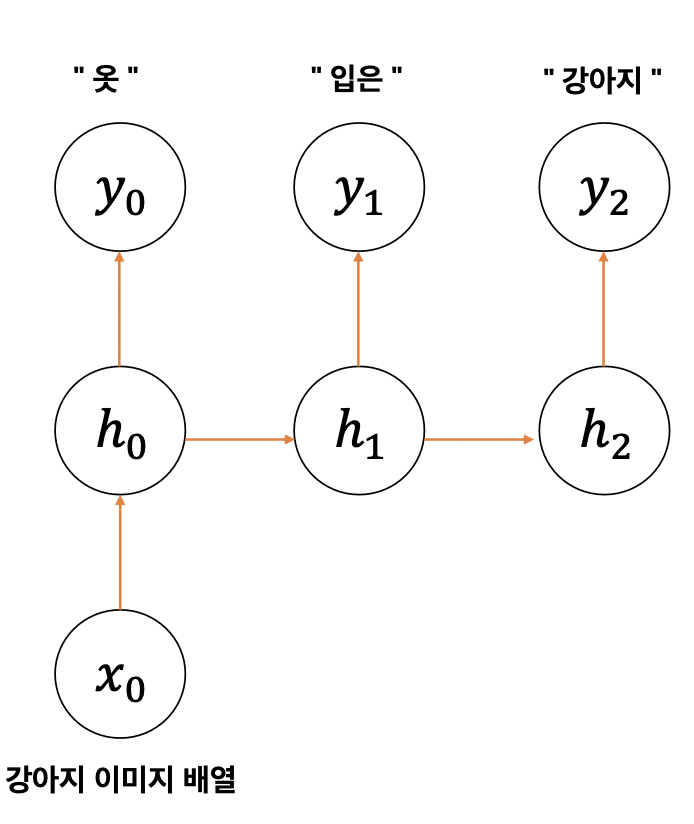

- Ìïú Ïû•Ïùò Ïù¥ÎØ∏ÏßÄÎ•º ÏûÖÎ†•Î∞õÏïÑ Ïù¥ÎØ∏ÏßÄÎ•º ÏÑ§Î™ÖÌïòÎäî ÌÖçÏä§Ìä∏Î•º Ï∂úÎ†•ÌïòÎäî Î™®Îç∏Î°ú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.

3) Ïó¨Îü¨ Í∞úÎ•º ÏûÖÎ†•Î∞õÏïÑ Ïó¨Îü¨ Í∞úÎ•º Ï∂úÎ†•ÌïòÎäî many-to-many 
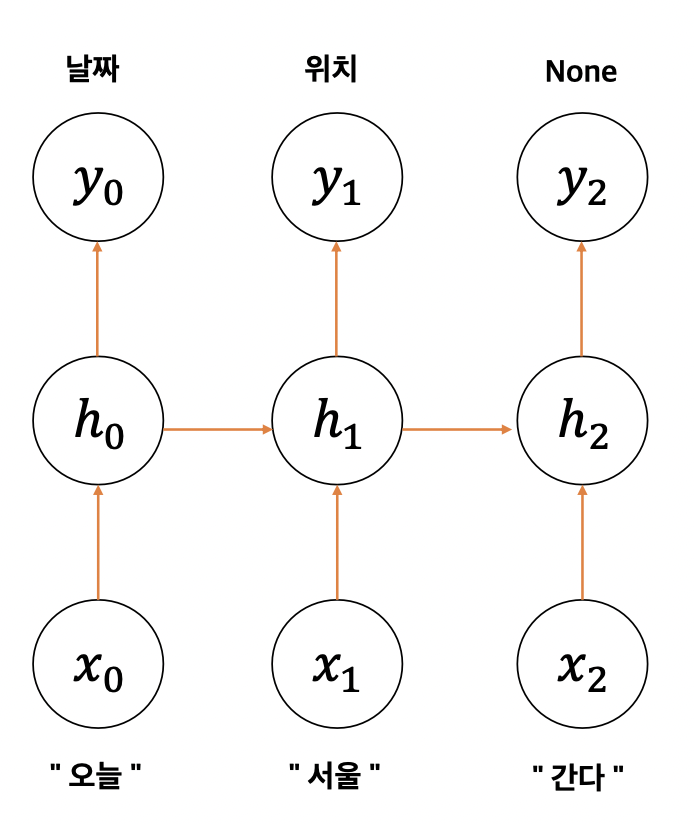

- Ïù¥ Î™®Îç∏ÏùÄ Ïö∞Î¶¨Í∞Ä ÏïûÏúºÎ°ú Íµ¨ÌòÑÌï† Í∞úÏ≤¥Î™Ö Ïù∏ÏãùÍ∏∞ÏóêÎèÑ ÏÇ¨Ïö©ÌïòÎäî Î™®Îç∏ÏûÖÎãàÎã§.
- Îã®Ïñ¥ ÏãúÌÄÄÏä§Î•º ÏûÖÎ†•ÏúºÎ°ú Î∞õÏïÑ Í∞Å ÏãúÌÄÄÏä§Í∞Ä ÏùòÎØ∏ÌïòÎäî Í∞úÏ≤¥Î™ÖÏùÑ Ï∂úÎ†•ÌïòÎäî Íµ¨Ï°∞Î°ú Î≤àÏó≠Í∏∞ Î™®Îç∏Î°úÎèÑ ÏÇ¨Ïö© Í∞ÄÎä•Ìï©ÎãàÎã§.

### RNN Î™®Îç∏Ïùò ÌååÎùºÎØ∏ÌÑ∞
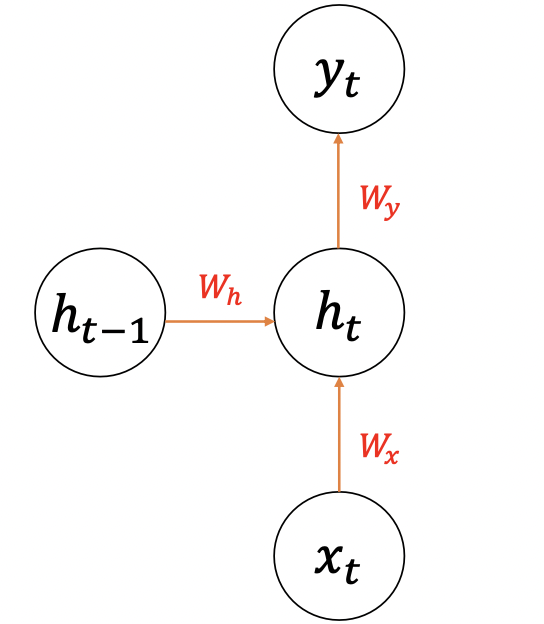
RNNÏù¥ ÏàòÏãùÏ†ÅÏúºÎ°ú Ïñ¥ÎñªÍ≤å ÎèôÏûëÌïòÎäîÏßÄ ÏïåÏïÑÎ¥ÖÏãúÎã§.

$x_t$, $y_t$, $h_t$Îäî ÏïûÏÑú ÏÑ§Î™ÖÌïú ÏùòÎØ∏ÏôÄ Í∞ôÍ≥† $w_x$Îäî ÏûÖÎ†• $x_t$Ïóê ÎåÄÌïú Í∞ÄÏ§ëÏπò, $w_h$Îäî Ïù¥Ï†Ñ ÏãúÏ†êÏùò ÏùÄÎãâ ÏÉÅÌÉØÍ∞íÏù∏ $h_{t-1}$Ïóê ÎåÄÌïú Í∞ÄÏ§ëÏπò, $w_y$Îäî ÌòÑÏû¨ ÏãúÏ†êÏùò ÏùÄÎãâ ÏÉÅÌÉØÍ∞íÏù∏ $h_t$Ïóê ÎåÄÌïú Í∞ÄÏ§ëÏπòÏûÖÎãàÎã§.

- ÏùÄÎãâÏ∏µ: $h_t=tanh(w_xx_t+w_hh_{t-1}+b_h)$
- Ï∂úÎ†•Ï∏µ: $y_t=w_yh_t + b_y$

ÌòÑÏû¨ ÏãúÏ†êÏùò ÏùÄÎãâ ÏÉÅÌÉØÍ∞í $h_t$Îäî ÌôúÏÑ±Ìôî Ìï®ÏàòÏù∏ ÌïòÏù¥ÌçºÎ∏îÎ¶≠ ÌÉÑÏ††Ìä∏($tanh$)Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌòÑÏû¨ ÏûÖÎ†•Í∞íÍ≥º Ïù¥Ï†Ñ ÏãúÏ†êÏùò ÏùÄÎãâ ÏÉÅÌÉúÍ∞íÏúºÎ°ú Í≥ÑÏÇ∞Ìï©ÎãàÎã§. Ïù¥Îïå **Ïù¥Ï†Ñ ÏãúÏ†êÏùò ÏùÄÎãâ ÏÉÅÌÉØÍ∞íÏù¥ ÌòÑÏû¨ ÏãúÏ†êÏùò ÏùÄÎãâ ÏÉÅÌÉúÏóê Í≥ÑÏÜçÌï¥ÏÑú ÏòÅÌñ•**ÏùÑ Ï£ºÍ∏∞ ÎïåÎ¨∏Ïóê ÏãúÌÄÄÏä§ Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏßïÏùÑ Ïûò ÌååÏïÖÌï† Ïàò ÏûàÏäµÎãàÎã§.

ÎßàÏßÄÎßâÏúºÎ°ú Ï∂úÎ†•Ï∏µ $y_t$Îäî Î©îÎ™®Î¶¨ ÏÖÄÏóêÏÑú Í≥ÑÏÇ∞Îêú ÏùÄÎãâ ÏÉÅÌÉØÍ∞í $h_t$ÏôÄ Í∞ÄÏ§ëÏπò $w_y$Î•º Í≥±Ìïú Í∞íÏúºÎ°ú Í≥ÑÏÇ∞Ìï©ÎãàÎã§.

### RNN Î™®Îç∏ Íµ¨ÌòÑ Ïã§Ïäµ

ÌäπÏ†ï Î≤îÏúÑÎßåÌÅºÏùò $sin$ ÌååÌòï ÏãúÌÄÄÏä§Î•º ÌïôÏäµÌï¥ Îã§Ïùå Ïä§ÌÖùÏùò ÌååÌòïÏùÑ ÏòàÏ∏°ÌïòÎäî RNN Î™®Îç∏ Íµ¨ÌòÑÏùÑ Ìï¥Î¥ÖÏãúÎã§.

-10ÏóêÏÑú +10 ÏÇ¨Ïù¥Ïùò xÏ∂ï Î≤îÏúÑÎ•º Í∞ÄÏßÄÎäî sin() Ìï®Ïàò Í∞íÏùÑ 0.1 Îã®ÏúÑÎ°ú Ï¶ùÍ∞ÄÏãúÏºú train_y Î¶¨Ïä§Ìä∏Ïóê Ï†ÄÏû•Ìï©ÎãàÎã§. 

In [ ]:
# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
n_timesteps = 15
n_features = 1

# ÏãúÌÄÄÏä§ ÎÇòÎàÑÍ∏∞
# train_x.shape => (samples, timesteps)
# train_y.shape => (samples)
train_x, train_y = split_sequence(train_y, step=n_timesteps)
print("shape x:{} / y:{}".format(train_x.shape, train_y.shape))

shape x:(185, 15) / y:(185,)


RNN Î™®Îç∏ÏóêÏÑú ÏÇ¨Ïö©ÌïòÎäî ÏûÖÎ†• ÏãúÌÄÄÏä§ Í∏∏Ïù¥(n_timesteps)Î•º 15Î°ú Ï†ïÏùòÌïòÍ≥†, ÏûÖÎ†• Î≤°ÌÑ∞Ïùò Ï∞®Ïõê ÌÅ¨Í∏∞Îäî(n_features)Îäî 1Î°ú Ï†ïÏùòÌï©ÎãàÎã§. Ïù¥Îïå n_timestepsÎßåÌÅº RNN Î©îÎ™®Î¶¨ ÏÖÄÏù¥ ÏÉùÏÑ±Îê©ÎãàÎã§.

Í∑∏ ÌõÑ split_sequence() Ìï®ÏàòÎ•º Ìò∏Ï∂úÌï¥ ÏûÖÎ†• ÏãúÌÄÄÏä§Î•º ÎßåÎì§Í≥†, sin ÌååÌòïÏùò ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Í∞Ä Îì§Ïñ¥ÏûàÎäî train_y Î¶¨Ïä§Ìä∏ÏóêÏÑú n_timestepsÎßåÌÅº ÏûÖÎ†• ÏãúÌÄÄÏä§Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.

In [ ]:
# RNN ÏûÖÎ†• Î≤°ÌÑ∞ ÌÅ¨Í∏∞Î•º ÎßûÏ∂îÍ∏∞ ÏúÑÌï¥ Î≤°ÌÑ∞ Ï∞®Ïõê ÌÅ¨Í∏∞ Î≥ÄÍ≤Ω
# reshape from [samples, timesteps] into [samples, timesteps, features]
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
print("train_x.shape = {}".format(train_x.shape))
print("train_y.shape = {}".format(train_y.shape))

train_x.shape = (185, 15, 1)
train_y.shape = (185,)


ÏºÄÎùºÏä§ÏóêÏÑú RNN Í≥ÑÏ∏µÏùÑ ÏÇ¨Ïö©ÌïòÎ†§Î©¥ 3Ï∞®Ïõê ÌÖêÏÑú ÌòïÌÉúÏó¨Ïïº Ìï©ÎãàÎã§. Îî∞ÎùºÏÑú 2Ï∞®Ïõê(samples, time step)Ïù∏ train_xÎ•º 3Ï∞®Ïõê(batch size, time step, input length) ÌòïÌÉúÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.

In [ ]:
# RNN Î™®Îç∏ Ï†ïÏùò
model = Sequential()
model.add(SimpleRNN(units=10,
                    return_sequences=False,
                    input_shape=(n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

sin ÌååÌòï Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌïôÏäµÌïòÍ∏∞ ÏúÑÌïú Î™®Îç∏Î°úÎäî Í∞ÄÏû• Í∞ÑÎã®Ìïú ÌòïÌÉúÏùò RNN Í≥ÑÏ∏µÏù∏ SimpleRNN Í≥ÑÏ∏µ 1Í∞úÏôÄ Ï∂úÎ†•ÏùÑ ÏúÑÌïú Dense Í≥ÑÏ∏µ 1Í∞úÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏäµÎãàÎã§. 

- units: RNN Í≥ÑÏ∏µÏóê Ï°¥Ïû¨ÌïòÎäî Ï†ÑÏ≤¥ Îâ¥Îü∞ Ïàò
- return_sequences: ÏïûÏÑú Î∞∞Ïö¥ RNN Í≥ÑÏÇ∞ Í≥ºÏ†ïÏóêÏÑú ÏùÄÎãâ ÏÉÅÌÉØÍ∞íÏùÑ Ï∂úÎ†•Ìï†ÏßÄ Í≤∞Ï†ï (false: ÎßàÏßÄÎßâ ÏãúÏ†êÏùò Î©îÎ™®Î¶¨ ÏÖÄÏóêÏÑúÎßå Í≤∞Í≥º Ï∂úÎ†• / True: Î™®Îì† RNN Í≥ÑÏÇ∞ Í≥ºÏ†ïÏóêÏÑú Í≤∞Í≥º Ï∂úÎ†•)

ÏÜêÏã§ Ìï®ÏàòÎ°úÎäî mseÎ•º ÏÇ¨Ïö©ÌïòÎ©∞ ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ°úÎäî adamÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏ†ÅÌôîÌï©ÎãàÎã§.

In [ ]:
# Î™®Îç∏ ÌïôÏäµ
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='loss',
    patience=5,
    mode='auto'
)
history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping])

Epoch 1/1000
6/6 [==============================] - 2s 12ms/step - loss: 0.1082
Epoch 2/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.0369
Epoch 3/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.0125
Epoch 4/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 5/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.0130
Epoch 6/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.0105
Epoch 7/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0082
Epoch 8/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0075
Epoch 9/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0072
Epoch 10/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0067
Epoch 11/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0062
Epoch 12/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0058
Epoch 13/1000
6/6 [===========================

ÏÉùÏÑ±Ìïú Î™®Îç∏ÏùÑ Ïã§Ï†ú ÌïôÏäµÌï©ÎãàÎã§. Ïù¥Î≤à ÏòàÏ†úÏóêÏÑúÎäî Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÏÉùÎûµÌïòÏòÄÍ≥†, Ïò§Î≤ÑÌîºÌåÖÏùÑ ÌîºÌïòÍ∏∞ ÏúÑÌï¥ ÏÜêÏã§(loss)Ïù¥ Í∞ëÏûêÍ∏∞ Ï¶ùÍ∞ÄÎêòÎäî ÏãúÏ†êÏùÑ Ï∞æÏùÑ Ïàò ÏûàÎäî Ï°∞Í∏∞ Ï¢ÖÎ£å(EarlyStopping) ÏΩúÎ∞± Í∞ùÏ≤¥Î•º ÏÇ¨Ïö©ÌñàÏäµÎãàÎã§. ÏòàÏ†úÏóêÏÑúÎäî patience=5Î•º ÌÜµÌï¥ ÏÑ±Îä•Ïù¥ Ï¶ùÍ∞ÄÌïòÏßÄ ÏïäÏùÑ Îïå 5ÏóêÌè¨ÌÅ¨ Ï†ïÎèÑ Îçî ÌïôÏäµÌïòÎèÑÎ°ù ÏÑ§Ï†ïÌñàÏäµÎãàÎã§.

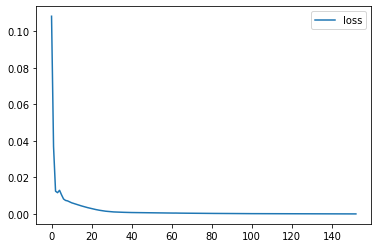

In [ ]:
# loss Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
plt.plot(history.history['loss'], label="loss")
plt.legend(loc="upper right")
plt.show()

ÌïôÏäµ ÏóêÌè¨ÌÅ¨ Ï¶ùÍ∞ÄÏóê Îî∞Î•∏ ÏÜêÏã§ Í∑∏ÎûòÌîÑÏûÖÎãàÎã§. ÌïôÏäµÏù¥ ÏßÑÌñâÎê†ÏàòÎ°ù ÏÜêÏã§Ïù¥ Ï§ÑÏñ¥Îì§Í≥† ÏûàÎäî Î™®ÏäµÏùÑ Î≥¥ÏûÖÎãàÎã§.

In [ ]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
test_x = np.arange(10, 20, 0.1)
calc_y = np.cos(test_x) # ÌÖåÏä§Ìä∏ Ï†ïÎãµ Îç∞Ïù¥ÌÑ∞

# RNN Î™®Îç∏ ÏòàÏ∏° Î∞è Î°úÍ∑∏ Ï†ÄÏû•
test_y = calc_y[:n_timesteps]
for i in range(len(test_x) - n_timesteps):
  net_input = test_y[i : i + n_timesteps]
  net_input = net_input.reshape((1, n_timesteps, n_features))
  train_y = model.predict(net_input, verbose=0)
  print(test_y.shape, train_y.shape, i, i + n_timesteps)
  test_y = np.append(test_y, train_y)

(15,) (1, 1) 0 15
(16,) (1, 1) 1 16
(17,) (1, 1) 2 17
(18,) (1, 1) 3 18
(19,) (1, 1) 4 19
(20,) (1, 1) 5 20
(21,) (1, 1) 6 21
(22,) (1, 1) 7 22
(23,) (1, 1) 8 23
(24,) (1, 1) 9 24
(25,) (1, 1) 10 25
(26,) (1, 1) 11 26
(27,) (1, 1) 12 27
(28,) (1, 1) 13 28
(29,) (1, 1) 14 29
(30,) (1, 1) 15 30
(31,) (1, 1) 16 31
(32,) (1, 1) 17 32
(33,) (1, 1) 18 33
(34,) (1, 1) 19 34
(35,) (1, 1) 20 35
(36,) (1, 1) 21 36
(37,) (1, 1) 22 37
(38,) (1, 1) 23 38
(39,) (1, 1) 24 39
(40,) (1, 1) 25 40
(41,) (1, 1) 26 41
(42,) (1, 1) 27 42
(43,) (1, 1) 28 43
(44,) (1, 1) 29 44
(45,) (1, 1) 30 45
(46,) (1, 1) 31 46
(47,) (1, 1) 32 47
(48,) (1, 1) 33 48
(49,) (1, 1) 34 49
(50,) (1, 1) 35 50
(51,) (1, 1) 36 51
(52,) (1, 1) 37 52
(53,) (1, 1) 38 53
(54,) (1, 1) 39 54
(55,) (1, 1) 40 55
(56,) (1, 1) 41 56
(57,) (1, 1) 42 57
(58,) (1, 1) 43 58
(59,) (1, 1) 44 59
(60,) (1, 1) 45 60
(61,) (1, 1) 46 61
(62,) (1, 1) 47 62
(63,) (1, 1) 48 63
(64,) (1, 1) 49 64
(65,) (1, 1) 50 65
(66,) (1, 1) 51 66
(67,) (1, 1) 52 67
(68

ÌïôÏäµÌïú RNN Î™®Îç∏ÏùÑ ÌÖåÏä§Ìä∏Í∞ÄÌûà ÏúÑÌï¥ ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§. 10ÏóêÏÑú 20 ÏÇ¨Ïù¥Ïùò xÏ∂ï Î≤îÏúÑÎ•º Í∞ÄÏßÄÎäî cos() Ìï®Ïàò Í∞íÏùÑ 0.1 Îã®ÏúÑÎ°ú Ï¶ùÍ∞ÄÏãúÏºú calc_y Î¶¨Ïä§Ìä∏Ïóê Ï†ÄÏû•Ìï©ÎãàÎã§. (cos() Ìï®ÏàòÎ•º Ïù¥Ïö©Ìï¥ ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎßåÎìúÎäî Ïù¥Ïú†Îäî ÌïôÏäµÎêú sin ÌååÌòïÍ≥º Ï£ºÍ∏∞Ï†Å Ï∞®Ïù¥Î•º Ï£ºÍ∏∞ ÏúÑÌï¥ÏÑúÏûÖÎãàÎã§.)

ÌïôÏäµÎêú RNN Î™®Îç∏Ïùò ÏòàÏ∏°Í∞íÏùÑ Í∑∏ÎûòÌîÑÎ°ú Í∑∏Î¶¨Í∏∞ ÏúÑÌï¥ test_y Î¶¨Ïä§Ìä∏Ïóê ÏàúÏ∞®Ï†ÅÏúºÎ°ú Ï†ÄÏû•Ìï©ÎãàÎã§.

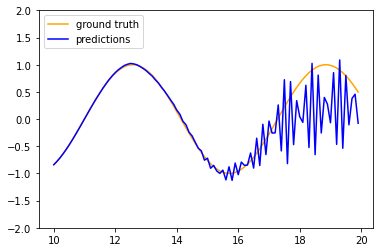

In [ ]:
# ÏòàÏ∏° Í≤∞Í≥º Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.plot(test_x, calc_y, label="ground truth", color="orange")
plt.plot(test_x, test_y, label="predictions", color="blue")

plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()

ÏòàÏ∏° Í≤∞Í≥ºÎ•º Í∑∏ÎûòÌîÑÎ°ú Ï∂úÎ†•Ìïú Í≤∞Í≥ºÏûÖÎãàÎã§. ÌùêÎ¶∞ Ïã§ÏÑ†Ïùò sin ÌååÌòïÏù¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï†ïÎãµ Îç∞Ïù¥ÌÑ∞Ïù¥Î©∞, ÏßÑÌïú Ïã§ÏÑ†Ïùò sin ÌååÌòïÏù¥ Ïö∞Î¶¨Í∞Ä ÌïôÏäµÌïú RNN Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥ºÏûÖÎãàÎã§. Ïã§Ï†ú Ï†ïÎãµÍ≥º Ïò§Ï∞®Í∞Ä Í±∞Ïùò ÏóÜÏù¥ ÏòàÏ∏°ÎêòÏóàÏäµÎãàÎã§.

## 6.3.2 LSTM

ÏïûÏÑú ÏÇ¥Ìé¥Î≥∏ RNN Î™®Îç∏ÏùÄ ÏûÖÎ†• ÏãúÌÄÄÏä§Ïùò ÏãúÏ†êÏù¥ Í∏∏Ïñ¥ÏßàÏàòÎ°ù ÏïûÏ™ΩÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Îí§Ï™ΩÏúºÎ°ú Ïûò Ï†ÑÎã¨ÎêòÏßÄ ÏïäÏïÑ ÌïôÏäµ Îä•Î†•Ïù¥ Îñ®Ïñ¥ÏßëÎãàÎã§. ÎòêÌïú RNNÏùÑ Îã§Ï∏µ Íµ¨Ï°∞Î°ú ÏåìÏúºÎ©¥ ÏûÖÎ†•Í≥º Ï∂úÎ†• Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïù¥Ïùò Ïó∞Í¥Ä Í¥ÄÍ≥ÑÍ∞Ä Ï§ÑÏñ¥Îì§Ïñ¥ **Ïû•Í∏∞ ÏùòÏ°¥ÏÑ±(Long-Term Dependency)** Î¨∏Ï†úÍ∞Ä ÏÉùÍπÅÎãàÎã§. Ïù¥Îü¨Ìïú Î¨∏Ï†úÎ•º Î≥¥ÏôÑÌïòÍ∏∞ ÏúÑÌï¥ Í∏∞Ï°¥ RNNÏùÑ Î≥ÄÌòïÌïú **LSTM(Long Short Term Memory)**ÏùÑ Í∞úÎ∞úÌñàÏäµÎãàÎã§.

### LSTMÏùò ÎÇ¥Î∂Ä Íµ¨Ï°∞

LSTMÏùÄ Í∏∞Î≥∏Ï†ÅÏù∏ RNNÏùò ÏùÄÎãâ ÏÉÅÌÉúÎ•º Í≥ÑÏÇ∞ÌïòÎäî Î∞©ÏãùÏóê Î≥ÄÌôîÍ∞Ä ÏûàÏúºÎ©∞, ÏùÄÎãâ ÏÉÅÌÉØÍ∞í Ïù¥Ïô∏Ïóê ÏÖÄ ÏÉÅÌÉØÍ∞íÏù¥ Ï∂îÍ∞ÄÎêòÏñ¥ **ÏûÖÎ†• Í≤åÏù¥Ìä∏(Input Gate), ÏÇ≠Ï†ú Í≤åÏù¥Ìä∏(Forget Gate), Ï∂úÎ†• Í≤åÏù¥Ìä∏(Output Gate)**Ïùò 3Í∞ÄÏßÄ Í≤åÏù¥Ìä∏Î°ú Íµ¨ÏÑ±Îê©ÎãàÎã§.

- **ÏûÖÎ†• Í≤åÏù¥Ìä∏(Input Gate)**: ÌòÑÏû¨ Ï†ïÎ≥¥Î•º ÏñºÎßàÎÇò Í∏∞ÏñµÌï†ÏßÄ Í≤∞Ï†ïÌïòÎäî Í≤åÏù¥Ìä∏
    
    $i_t=œÉ(w_{xi}x_t + w_{hi}h_{t-1}+b_i)$
    
    $g_t=tanh(w_{xg}x_t+w_{hg}h_{t-1}+b_g)$
    
    ÌòÑÏû¨ ÏãúÏ†êÏùò ÏûÖÎ†•Í∞í($x_t$)Í≥º Ïù¥Ï†Ñ ÏãúÏ†êÏùò ÏùÄÎãâ ÏÉÅÌÉØÍ∞í($h_{t-1}$)ÏùÑ Ïó∞Í¥ÄÎêú Í∞ÄÏ§ëÏπòÎ°ú Í≥±Ìï¥ 2Í∞úÏùò ÌôúÏÑ±Ìôî Ìï®Ïàò(ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®ÏàòÏôÄ ÌïòÏù¥ÌçºÎ∏îÎ¶≠ ÌÉÑÏÑºÌä∏ Ìï®Ïàò) Í≥ÑÏÇ∞ÌïòÏó¨ **Í∏∞ÏñµÌï† Ï†ïÎ≥¥Ïùò ÏñëÏùÑ Í≤∞Ï†ï**Ìï©ÎãàÎã§. 
    

- **ÏÇ≠Ï†ú Í≤åÏù¥Ìä∏(Forget Gate)**: Ïù¥Ï†Ñ ÏãúÏ†êÏùò ÏÖÄ ÏÉÅÌÉØÍ∞íÏùÑ ÏÇ≠Ï†úÌïòÍ∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©
    
    $f_t=œÉ(w_{xf}x_t+w_{hf}h_{t-1}+b_f)$
    
    ÌòÑÏû¨ ÏãúÏ†êÏùò ÏûÖÎ†•Í∞í($x_t$)Í≥º Ïù¥Ï†Ñ ÏãúÏ†êÏùò ÏùÄÎãâ ÏÉÅÌÉØÍ∞í($h_{t-1}$)ÏùÑ ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®ÏàòÎ•º ÌÜµÌï¥ 0~1 ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú Ï∂úÎ†•ÌïòÏó¨ ÏÇ≠Ï†ú Í≤åÏù¥Ìä∏Ïùò Í≤∞Í≥ºÍ∞í($f_t$)ÏúºÎ°ú Í∏∞ÏñµÎêú Ï†ïÎ≥¥Î•º ÏñºÎßàÎÇò ÏÇ≠Ï†úÌï†ÏßÄ Í∞ïÎèÑÎ•º Í≤∞Ï†ïÌï©ÎãàÎã§.
    
    $c_t=(c_{t-1}f_t)+(i_tg_t)$
    
    ÏûÖÎ†• Í≤åÏù¥Ìä∏ÏôÄ ÏÇ≠Ï†ú Í≤åÏù¥Ìä∏Ïùò Í≤∞Í¥èÍ∞íÏúºÎ°ú ÌòÑÏû¨ ÏãúÏ†êÏùò ÏÖÄ ÏÉÅÌÉúÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§. ÏÖÄ ÏÉÅÌÉúÍ∞í $c_t$(Ïò§Îû´ÎèôÏïà Ï†ïÎ≥¥ ÌäπÏÑ±ÏùÑ Í∏∞ÏñµÌï† Ïàò ÏûàÍ∏∞Ïóê Ïû•Í∏∞ ÏÉÅÌÉúÎùºÍ≥†ÎèÑ Î∂ÄÎ¶Ñ)Îäî ÏûÖÎ†• Í≤åÏù¥Ìä∏ÏôÄ ÏÇ≠Ï†ú Í≤åÏù¥Ìä∏Ïùò Í≤∞Í≥ºÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäîÎç∞, **ÏÇ≠Ï†ú Í≤åÏù¥Ìä∏Îäî Ïù¥Ï†Ñ ÏãúÏ†êÏùò ÏûÖÎ†•ÏùÑ ÏñºÎßàÎÇò Î∞òÏòÅÌï†ÏßÄ, ÏûÖÎ†• Í≤åÏù¥Ìä∏Îäî ÌòÑÏû¨ ÏãúÏ†êÏùò ÏûÖÎ†•ÏùÑ ÏñºÎßàÎÇò Î∞òÏòÅÌï†ÏßÄ** Í≤∞Ï†ïÌï©ÎãàÎã§.
    
- **Ï∂úÎ†• Í≤åÏù¥Ìä∏(Output Gate)**: Ï∂úÎ†• Í≤åÏù¥Ìä∏Ïùò Í≤∞Í≥ºÍ∞í($œÉ_t$)Ïù¥ ÌòÑÏû¨ ÏãúÏ†êÏùò ÏùÄÎãâ ÏÉÅÌÉú($h_t$)Î•º Í≤∞Ï†ïÌïòÎäî Îç∞ ÏÇ¨Ïö©ÎêòÎ©∞ Ìï¥Îãπ Í∞íÏùÄ Ï†ÑÎã¨ÎêòÎäî Î©îÎ™®Î¶¨ ÏÖÄÏù¥ ÎßéÏïÑÏßàÏàòÎ°ù Ï†ïÎ≥¥ Ïú†Ïã§Ïù¥ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê Îã®Í∏∞ ÏÉÅÌÉúÎùºÍ≥† Î∂ÄÎ¶ÖÎãàÎã§.
    
    $h_t=tanh(c_t)œÉ_t$
    
    Îã®Í∏∞ ÏÉÅÌÉú(ÏùÄÎãâ ÏÉÅÌÉú)Îäî Ïû•Í∏∞ ÏÉÅÌÉú(ÏÖÄ ÏÉÅÌÉØÍ∞í)Ïóê ÏòÅÌñ•ÏùÑ Î∞õÎäî Íµ¨Ï°∞ÏûÖÎãàÎã§.
    

### LSTM Î™®Îç∏ Íµ¨ÌòÑ Ïã§Ïäµ

RNN Î™®Îç∏ Íµ¨ÌòÑÍ≥º ÎèôÏùºÌïòÍ≤å ÌäπÏ†ï Î≤îÏúÑÎßåÌÅºÏùò $sin$ ÌååÌòï ÏãúÌÄÄÏä§Î•º ÌïôÏäµÌï¥ Îã§Ïùå Ïä§ÌÖùÏùò ÌååÌòïÏùÑ ÏòàÏ∏°ÌïòÎäî  LSTM Î™®Îç∏ Íµ¨ÌòÑÏùÑ Ìï¥Î¥ÖÏãúÎã§.

RNN Î™®Îç∏ ÏòàÏ†úÏóêÏÑú SimpleRNN ÌÅ¥ÎûòÏä§Î™ÖÏùÑ LSTMÏúºÎ°ú Î∞îÍøîÏ£ºÍ∏∞Îßå ÌïòÎ©¥ ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê ÏûêÏÑ∏Ìïú ÏÑ§Î™ÖÏùÑ ÏÉùÎûµÌïòÍ≤†ÏäµÎãàÎã§.

shape x:(185, 15) / y:(185,)
train_x.shape = (185, 15, 1)
train_y.shape = (185,)
Epoch 1/1000
6/6 [==============================] - 2s 7ms/step - loss: 0.1879
Epoch 2/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.1657
Epoch 3/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.1481
Epoch 4/1000
6/6 [==============================] - 0s 46ms/step - loss: 0.1350
Epoch 5/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.1251
Epoch 6/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.1166
Epoch 7/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.1095
Epoch 8/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.1024
Epoch 9/1000
6/6 [==============================] - 0s 19ms/step - loss: 0.0960
Epoch 10/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0900
Epoch 11/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.0841
Epoch 12/1000
6/6 [=======================

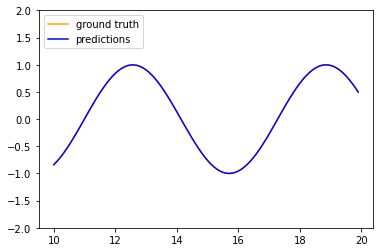

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM, SimpleRNN

# time stepÎßåÌÅº ÏãúÌÄÄÏä§ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
def split_sequence(sequence, step):
  x, y = list(), list()

  for i in range(len(sequence)):
    end_idx = i + step
    if end_idx > len(sequence) - 1:
      break

    seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
    x.append(seq_x)
    y.append(seq_y)

  return np.array(x), np.array(y)


# sin Ìï®Ïàò ÌïôÏäµ Îç∞Ïù¥ÌÑ∞
x = [i for i in np.arange(start=-10, stop=10, step=0.1)]
train_y = [np.sin(i) for i in x]

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
n_timesteps = 15
n_features = 1

# ÏãúÌÄÄÏä§ ÎÇòÎàÑÍ∏∞
# train_x.shape => (samples, timesteps)
# train_y.shape => (samples)
train_x, train_y = split_sequence(train_y, step=n_timesteps)
print("shape x:{} / y:{}".format(train_x.shape, train_y.shape))

# LSTM ÏûÖÎ†• Î≤°ÌÑ∞ ÌÅ¨Í∏∞Î•º ÎßûÏ∂îÍ∏∞ ÏúÑÌï¥ Î≤°ÌÑ∞ Ï∞®Ïõê ÌÅ¨Í∏∞ Î≥ÄÍ≤Ω
# reshape from [samples, timesteps] into [samples, timesteps, features]
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
print("train_x.shape = {}".format(train_x.shape))
print("train_y.shape = {}".format(train_y.shape))

# LSTM Î™®Îç∏ Ï†ïÏùò
model = Sequential()
model.add(LSTM(units=10,
                    return_sequences=False,
                    input_shape=(n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Î™®Îç∏ ÌïôÏäµ
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='loss',
    patience=5,
    mode='auto'
)
history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping])

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
test_x = np.arange(10, 20, 0.1)
calc_y = np.cos(test_x) # ÌÖåÏä§Ìä∏ Ï†ïÎãµ Îç∞Ïù¥ÌÑ∞

# LSTM Î™®Îç∏ ÏòàÏ∏° Î∞è Î°úÍ∑∏ Ï†ÄÏû•
test_y = calc_y[:n_timesteps]
for i in range(len(test_x) - n_timesteps):
  net_input = test_y[i : i + n_timesteps]
  net_input = net_input.reshape((1, n_timesteps, n_features))
  train_y = model.predict(net_input)
  # print(test_y.shape, train_y.shape, i, i + n_timesteps)
  test_y = np.append(test_y, train_y)

# ÏòàÏ∏° Í≤∞Í≥º Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.plot(test_x, calc_y, label="ground truth", color="orange")
plt.plot(test_x, test_y, label="predictions", color="blue")

plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()

LSTM Î™®Îç∏ÏùÑ Ïù¥Ïö©Ìïú ÏòàÏ∏° Í≤∞Í≥ºÎ•º Í∑∏ÎûòÌîÑÎ°ú Ï∂úÎ†•Ìïú Í∑∏Î¶ºÏûÖÎãàÎã§. ÌùêÎ¶∞ Ïã§ÏÑ†Ïùò sin ÌååÌòïÏù¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï†ïÎãµ Îç∞Ïù¥ÌÑ∞Ïù¥Î©∞, ÏßÑÌïú Ïã§ÏÑ†Ïùò sin ÌååÌòïÏù¥ Ïö∞Î¶¨Í∞Ä ÌïôÏäµÌïú LSTM Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥ºÏûÖÎãàÎã§. 

ÏïûÏÑú Ïã§ÏäµÌïú **RNN Î™®Îç∏Î≥¥Îã§ Ïò§Ï∞®Í∞Ä Îçî ÏûëÏïÑ Îëê Í∞úÏùò sin ÌååÌòïÏù¥ Í≤πÏ≥êÎ≥¥Ïù¥Îäî Î™®Ïäµ**ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

## 6.3.3 ÏñëÎ∞©Ìñ• LSTM 

<aside>
üí° Ìï∏ÎìúÌè∞ÏúºÎ°ú ______

</aside>

ÏúÑÏóê Îì§Ïñ¥Í∞à Îã®Ïñ¥Í∞Ä Î¨¥ÏóáÏù∏ÏßÄ ÎßûÏ∂îÏã§ Ïàò ÏûàÎÇòÏöî? ÏïÑÎßà Îí§Ïóê Ïù¥Ïñ¥ÏßÄÎäî Î¨∏Ïû•Ïù¥ ÏóÜÏñ¥ Î∞îÎ°ú ÎßûÏ∂îÍ∏∞ ÌûòÎìúÏÖ®ÏùÑ Í≤ÉÏûÖÎãàÎã§. 

<aside>
üí° Ìï∏ÎìúÌè∞ÏúºÎ°ú ______Î•º Í±∏ Ïàò ÏûàÏäµÎãàÎã§.

</aside>

ÎòëÍ∞ôÏùÄ ÏòàÏãúÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Îí§Ïóê Î¨∏Ïû•ÏùÑ ÏôÑÏÑ±ÌñàÏùÑ ÎïåÏóêÎäî Ïù¥Ï†ÑÎ≥¥Îã§ ÏàòÏõîÌûà ÏúÑÏóê Îã®Ïñ¥Î•º Ï±ÑÏö∏ Ïàò ÏûàÏùÑ Í≤É ÏûÖÎãàÎã§. 

**ÏñëÎ∞©Ìñ• LSTM**ÏùÄ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûÖÎ†• ÏàúÏúºÎ°ú Ï≤òÎ¶¨ÎêòÏñ¥ Ïù¥ÌõÑ ÏãúÏ†êÏùò Ï†ïÎ≥¥Î•º ÌôúÏö©ÌïòÏßÄ Î™ªÌïòÎäî RNNÍ≥º LSTMÏùò Îã®Ï†êÏùÑ Î≥¥ÏïàÌïú ÏàúÌôòÏã†Í≤ΩÎßùÏûÖÎãàÎã§. Ïù¥Î•º ÏÇ¨Ïö©ÌïòÎ©¥ ÏñëÎ∞©Ìñ•ÏóêÏÑú Î¨∏Ïû•ÏùÑ ÏÇ¥Ìé¥Î≥º Ïàò ÏûàÏùåÏúºÎ°ú Îí∑Î∂ÄÎ∂ÑÏóê Ï§ëÏöîÌïú Ï†ïÎ≥¥ ÎòêÌïú Î∂ÑÏÑùÌïòÏó¨ Ï†ïÎ≥¥ ÏÜêÏã§ ÏóÜÏù¥ Î¨∏Ïû•ÏùÑ Ï≤òÎ¶¨Ìï† Ïàò ÏûàÎã§Îäî Ïû•Ï†êÏù¥ ÏûàÏäµÎãàÎã§. 

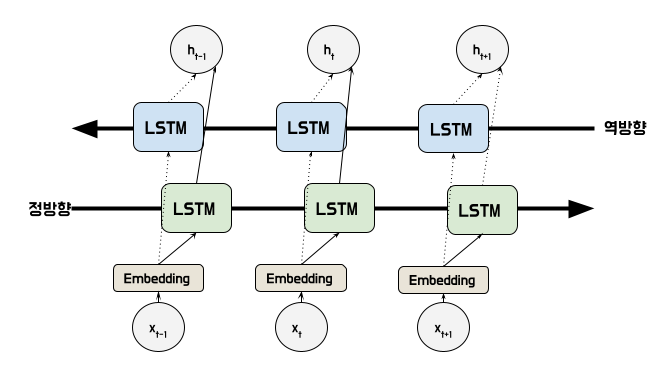

### KerasÏùò  ÏñëÎ∞©Ìñ• LSTMÎ°ú IMDB Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÌïòÍ∏∞

[Keras documentation: Bidirectional LSTM on IMDB](https://keras.io/examples/nlp/bidirectional_lstm_imdb/)

**Ï§ÄÎπÑ**

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 20000  # Ï≤òÏùå 2ÎßåÍ∞úÏùò Îã®Ïñ¥Îßå Í≥†Î†§Ìï©ÎãàÎã§
maxlen = 200  # Í∞Å Î¶¨Î∑∞Ïóê Ï≤´ 200Í∞úÏùò Îã®Ïñ¥Îßå Í≥†Î†§Ìï©ÎãàÎã§

**Î™®Îç∏ ÏÉùÏÑ±**

In [ ]:
# Í∞ÄÎ≥Ä Í∏∏Ïù¥ Ï†ïÏàò ÏãúÌÄÄÏä§Î•º ÏûÖÎ†•Ìï©ÎãàÎã§
inputs = keras.Input(shape=(None,), dtype="int32")
# 128Ï∞®Ïõê Î≤°ÌÑ∞Ïóê Í∞Å Ï†ïÏàòÎ•º Ìè¨Ìï®Ìï©ÎãàÎã§ 
x = layers.Embedding(max_features, 128)(inputs)

# ÏñëÌï≠Ìñ• LSTMsÏùÑ Ï∂îÍ∞ÄÌï©ÎãàÎã§
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Î∂ÑÎ•òÍ∏∞Î•º Ï∂îÍ∞ÄÌï©ÎãàÎã§
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,757,761
Trainable params: 2,757,761
Non-train

IMDB Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [ ]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words=max_features
)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

17473536/17464789 [==============================] - 0s 0us/step
25000 Training sequences
25000 Validation sequences


Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞ÄÌïòÍ∏∞

In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val))

Epoch 1/2
782/782 [==============================] - 522s 654ms/step - loss: 0.0909 - accuracy: 0.9678 - val_loss: 0.4466 - val_accuracy: 0.8564
Epoch 2/2
782/782 [==============================] - 494s 632ms/step - loss: 0.0571 - accuracy: 0.9803 - val_loss: 0.4919 - val_accuracy: 0.8533


## 6.3.4 Í∞úÏ≤¥Î™Ö Ïù∏Ïãù Named Entity Recognition

Í∞úÏ≤¥Î™Ö Ïù∏ÏãùÏùÑ ÌÜµÌï¥ Ïñ¥Îñ§ Î¨∏Ïû• ÏïàÏóê Ïù∏Î¨º, Ïû•ÏÜå, ÎÇ†Ïßú Îì±Ïùò Îã®Ïñ¥Í∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎäîÏßÄÎ•º Î∂ÑÏÑùÌï† Ïàò ÏûàÏäµÎãàÎã§. 

<aside>
üí° ÏïÑÏù¥Î¶∞, ÌòÑÏû¨ ÏÑúÏö∏Ïùò ÎÇ†Ïî®Îäî Ïñ¥Îïå?

</aside>

Ï±óÎ¥áÏóêÍ≤å Ïù¥ÏôÄ Í∞ôÏùÄ Î¨∏Ïû•ÏùÑ Î¨ºÏñ¥Î≥¥Î©¥ Ï±óÎ¥áÏùÄ Í∞ÅÍ∞Å

- ÏïÑÏù¥Î¶∞ - Ïù∏Î¨º
- ÌòÑÏû¨ - ÎÇ†Ïßú
- ÏÑúÏö∏ - ÏßÄÏó≠

Í≥º Í∞ôÏù¥ Í∞úÏ≤¥Î™ÖÏùÑ Ïù∏ÏãùÌï©ÎãàÎã§. 

### Bio ÌëúÍ∏∞Î≤ï

**B**: Beginning - Í∞úÏ≤¥Î™ÖÏùÑ ÎÇòÌÉÄÎÇ¥Î©∞ ‚ÄòB-[Í∞úÏ≤¥Î™ÖÏùò Ï¢ÖÎ•ò]‚ÄôÏóê ÌÉúÍ∑∏Îê©ÎãàÎã§. 

**I**: Inside - Í∞úÏ≤¥Î™ÖÍ≥º Ïù¥Ïñ¥ÏßÑ Îã®Ïñ¥Î•º ÎÇòÌÉÄÎÇ¥Î©∞ ‚ÄòI-[Í∞úÏ≤¥Î™ÖÏùò Ï¢ÖÎ•ò]‚ÄôÏóê ÌÉúÍ∑∏Îê©ÎãàÎã§. 

**O**: Outside - Í∞úÏ≤¥Î™ÖÏù¥Ïô∏Ïóê Î™®Îì† Îã®Ïñ¥Ïóê ÌÉúÍ∑∏Îê©ÎãàÎã§. 

<aside>
üí° **ÌïòÎ≤ÑÎìú ÎåÄÌïôÍµêÏóê Îã§ÎãàÎäî ÏïÑÏù¥Î¶∞ Î∏åÎùºÏö¥ÏùÄ Ïò§Îäò Ï°∏ÏóÖÌï©ÎãàÎã§.**

ÌïòÎ≤ÑÎìú: B-University     Îã§Îãà: O     ÏïÑÏù¥Î¶∞: B-Person     Ïò§Îäò: B-Date    Ï°∏ÏóÖ: O
ÎåÄÌïôÍµê: I-University      Îäî: O         Î∏åÎùºÏö¥: I-Person                               Ìï©ÎãàÎã§.: O
Ïóê: O                                               ÏùÄ: O

</aside>

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/12.%20RNN%20Sequence%20Labeling/dataset/train.txt", filename="train.txt")

f = open('train.txt', 'r')
tagged_sentences = []
sentence = []

for line in f:
    if len(line)==0 or line.startswith('-DOCSTART') or line[0]=="\n":
        if len(sentence) > 0:
            tagged_sentences.append(sentence)
            sentence = []
        continue
    splits = line.split(' ') # Í≥µÎ∞±ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏÜçÏÑ±ÏùÑ Íµ¨Î∂ÑÌïúÎã§.
    splits[-1] = re.sub(r'\n', '', splits[-1]) # Ï§ÑÎ∞îÍøà ÌëúÏãú \nÏùÑ Ï†úÍ±∞ÌïúÎã§.
    word = splits[0].lower() # Îã®Ïñ¥Îì§ÏùÄ ÏÜåÎ¨∏ÏûêÎ°ú Î∞îÍøîÏÑú Ï†ÄÏû•ÌïúÎã§.
    sentence.append([word, splits[-1]]) # Îã®Ïñ¥ÏôÄ Í∞úÏ≤¥Î™Ö ÌÉúÍπÖÎßå Í∏∞Î°ùÌïúÎã§.

print("Ï†ÑÏ≤¥ ÏÉòÌîå Í∞úÏàò: ", len(tagged_sentences))
print('Ï≤´Î≤àÏß∏ ÏÉòÌîå :',tagged_sentences[1])

# Ï∞∏Í≥†ÏûêÎ£å: https://wikidocs.net/24682

### ÌïôÏäµ ÌèâÍ∞ÄÏùò Ï†ïÌôïÎèÑ

ÌïôÏäµ ÌèâÍ∞ÄÎ•º ÌôïÏù∏ÌñàÏùÑ Îïå ÏùòÎØ∏ÏûàÎäî ÌÉúÍ∑∏Í∞Ä ÏïÑÎãå O ÌÉúÍ∑∏Í∞Ä ÎåÄÎ∂ÄÎ∂ÑÏùÑ Ï∞®ÏßÄÌïòÍ≤å ÎêòÏñ¥ Ïã§Ï†úÎ≥¥Îã§ ÎÜíÏùÄ ÌïôÏäµ Ï†ïÌôïÎèÑÍ∞Ä ÎÇòÏòµÎãàÎã§. Îî∞ÎùºÏÑú Í∞úÏ≤¥Î™Ö Ïù∏ÏãùÏóêÎäî **F1 Ïä§ÏΩîÏñ¥**Î•º Í≥ÑÏÇ∞ÌïòÏó¨ ÏÑ±Îä• ÌèâÍ∞ÄÎ•º Ìï©ÎãàÎã§. 

- Ï†ïÌôïÎèÑ: Ïã§Ï†ú Ï†ïÎãµÍ≥º ÏñºÎßàÎÇò Ïú†ÏÇ¨ÌïúÏßÄ ÎÇòÌÉÄÎÉÖÎãàÎã§.
- Ï†ïÎ∞ÄÎèÑ: Í≤∞Í≥ºÍ∞íÏù¥ ÏùºÏ†ïÌïòÍ≤å Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÎäî Ï†ïÎèÑÎ•º ÎÇòÌÉÄÎÉÖÎãàÎã§.
- Ïû¨ÌòÑÏú®: Ïã§Ï†ú Ï†ïÎãµ Ï§ë ÏòàÏ∏° Î™®Îç∏Ïù¥ Ï†ïÎãµÏù¥Îùº ÏòàÏ∏°Ìïú Í≤ÉÏùò ÎπÑÏú®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.

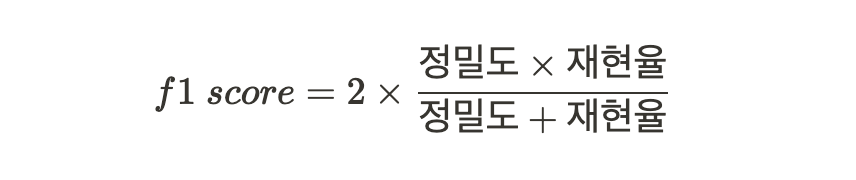

# ÎßàÎ¨¥Î¶¨

Ïù¥Î≤à ÏãúÍ∞ÑÏóêÎäî KerasÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ïù∏Í≥µÏã†Í≤ΩÎßùÏóê Í∏∞Ï¥àÎ•º ÌÉÑÌÉÑÌïòÍ≤å Ïû°ÏïÑÏ§Ñ Ïàò ÏûàÎäî **Îî•Îü¨Îãù Î∂ÑÎ•ò Î∞©Î≤ï, CNN Î™®Îç∏ ÎßåÎì§Í∏∞, RNNÍ≥º ÏñëÎ∞©Ìñ• LSTMÏùò ÎπÑÍµê**ÍπåÏßÄ Ìï¥Î≥¥ÏïòÏäµÎãàÎã§! 

Îã§Ïùå ÏãúÍ∞ÑÏóêÎäî **Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Îèô**ÏùÑ ÌïòÎäî Î∞©Î≤ïÍ≥º ÎçîÎ∂àÏñ¥ ÎìúÎîîÏñ¥ **Ï±óÎ¥á ÌïôÏäµÌà¥ ÎßåÎì§Í∏∞**Î•º Î∞∞ÏõåÎ≥¥Îäî ÏãúÍ∞ÑÏùÑ Í∞ñÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§!

Í∞êÏÇ¨Ìï©ÎãàÎã§üòä

üìçIreneÌåÄÏùò Î™®Îì† Ìè¨Ïä§ÌåÖÏùÄ *Ï≤òÏùå Î∞∞Ïö∞Îäî Îî•Îü¨Îãù Ï±óÎ¥á*ÏùÑ Í∏∞Î∞òÏúºÎ°ú Ìï©ÎãàÎã§